# Mandelbrot Set

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
def mandelbrot(h, w, max_iter):
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x + y*1j
    z = c
    divtime = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2

    return divtime

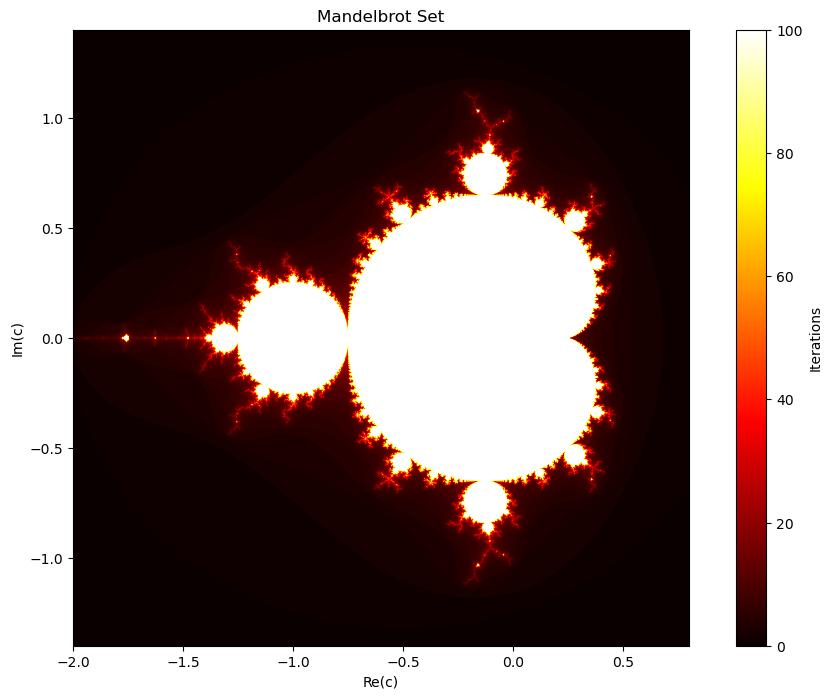

In [94]:
h, w = 1000, 1500
max_iter = 100

plt.figure(figsize=(12, 8))
plt.imshow(mandelbrot(h, w, max_iter), cmap='hot', extent=[-2, 0.8, -1.4, 1.4])
plt.title('Mandelbrot Set')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.colorbar(label='Iterations')
plt.show()

# Julia Set

In [95]:
def julia_set(h, w, max_iter, c):
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:2:w*1j]
    z = x + y*1j
    divtime = max_iter + np.zeros(z.shape, dtype=int)
    
    for i in range(max_iter):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2
    
    return divtime

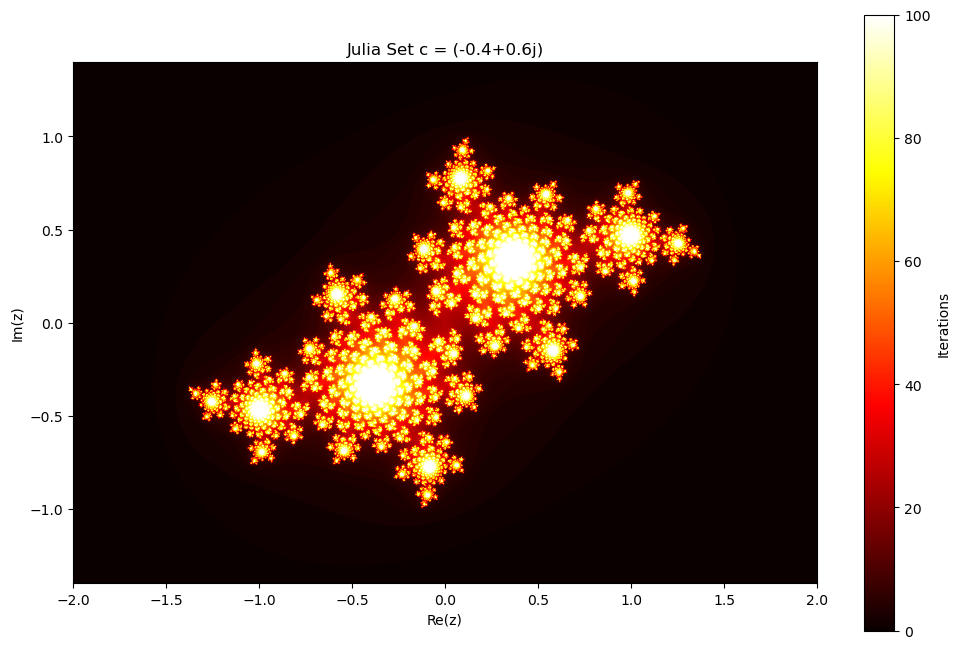

In [113]:
# Set the image dimensions and maximum iterations
h, w = 1000, 1500
max_iter = 100

# Set the c value for the Julia set
c = -0.4 + 0.6j
# c = -0.15 + 0.85j

# Generate the Julia set
julia = julia_set(h, w, max_iter, c)

# Create the plot
plt.figure(figsize=(12, 8))
plt.imshow(julia, cmap='hot', extent=[-2, 2, -1.4, 1.4])
plt.title(f'Julia Set c = {c}')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.colorbar(label='Iterations')
plt.show()

# Lorenz Attractor

In [ ]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def lorenz(state, t, sigma, rho, beta):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

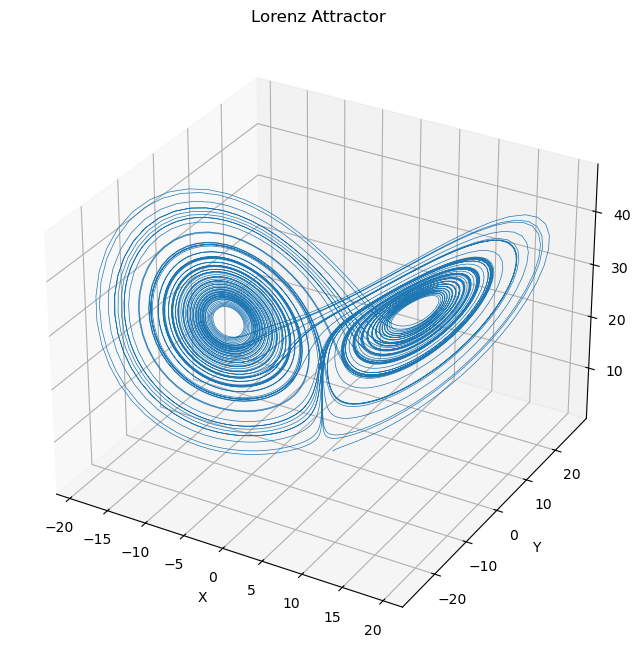

In [ ]:
# Lorenz system parameters
sigma = 10
rho = 28
beta = 8/3

# Initial state
state0 = [1.0, 1.0, 1.0]

# Time points
t = np.linspace(0, 100, 10000)

# Solve ODE
states = odeint(lorenz, state0, t, args=(sigma, rho, beta))

# Create the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Lorenz attractor
ax.plot(states[:, 0], states[:, 1], states[:, 2], lw=0.5)

# Customize the plot
ax.set_title("Lorenz Attractor")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Show the plot
plt.show()